# creating dataframe

## read in vcf file

In [1]:
import numpy as np
import pandas as pd
import fnmatch

file_path = '../data/HG02922_chr1_withancestral.vcf'

if fnmatch.fnmatchcase(file_path, '*.gz') == True:
    df = pd.read_csv(file_path, sep = '\t', compression = 'gzip', comment = '#')

    #add column names
    df.columns = ['CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT','SAMPLES']

    #split GT
    df[['GT_1','GT_2']] = df.SAMPLES.str.split("|",expand=True,)

    df = df[df["CHROM"]=='chr1']
    
    #print(df)

else:
    anc_df = pd.read_csv(file_path, sep = '\t', comment = '#')
    anc_df.columns = ['CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT','SAMPLES']

    print(anc_df)

         CHROM        POS ID  REF   ALT  QUAL FILTER  \
0            1      10235  .    T    TA   100   PASS   
1            1      10352  .    T    TA   100   PASS   
2            1      10505  .    A     T   100   PASS   
3            1      10506  .    C     G   100   PASS   
4            1      10511  .    G     A   100   PASS   
...        ...        ... ..  ...   ...   ...    ...   
6468088      1  249240217  .    G  GT,T   100   PASS   
6468089      1  249240219  .    A     T   100   PASS   
6468090      1  249240537  .  GGT     G   100   PASS   
6468091      1  249240539  .    T     G   100   PASS   
6468092      1  249240543  .  AGG     A   100   PASS   

                               INFO FORMAT SAMPLES  
0        AA=|||unknown(NO_COVERAGE)     GT     0|0  
1        AA=|||unknown(NO_COVERAGE)     GT     1|0  
2                           AA=.|||     GT     0|0  
3                           AA=.|||     GT     0|0  
4                           AA=.|||     GT     0|0  
...      

In [7]:
from collections import Counter

Counter(anc_df.SAMPLES)

Counter({'0|0': 6077395,
         '1|0': 127960,
         '1|1': 130164,
         '0|1': 128710,
         '2|0': 1105,
         '2|1': 233,
         '2|2': 890,
         '0|2': 1167,
         '3|1': 19,
         '0|3': 65,
         '4|0': 7,
         '1|2': 228,
         '3|2': 16,
         '3|3': 27,
         '2|3': 13,
         '3|0': 52,
         '4|2': 5,
         '3|4': 2,
         '1|3': 16,
         '5|0': 1,
         '0|4': 9,
         '2|4': 1,
         '5|1': 1,
         '4|5': 1,
         '4|4': 1,
         '4|1': 3,
         '5|6': 1,
         '6|0': 1})

## alteration for overlapping

### SNP´s

In [11]:
double = []
for index, row in short_df2.iterrows():
    if  row.DIST_R == 1 and len(row.ALT) == 1 and len(row.REF) == 1 and len(row.ALT2) == 1 and len(row.REF2) == 1 and row.SAMPLES != '0|0' and row.GT2 != '0|0' and ((row.SAMPLES == row.GT2) or ((row.SAMPLES == '1|1') or (row.GT2 == '1|1'))):
        double.append(row)

dsnp_df = pd.DataFrame(double)
dsnpbed = dsnp_df[['CHROM', 'POS']]
dsnpbed['POS2'] = dsnpbed['POS'] + 1
dsnpbed['ID'] = np.arange(dsnpbed.shape[0])
dsnpbed.to_csv('dB.bed', sep='\t', index=False, header=False)
    

/scratch/local/ipykernel_73074/2787604139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsnpbed['POS2'] = dsnpbed['POS'] + 1
/scratch/local/ipykernel_73074/2787604139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsnpbed['ID'] = np.arange(dsnpbed.shape[0])


In [12]:
snp_df = anc_df.copy()

snp_df = snp_df[snp_df['SAMPLES']!='0|0']

snpbed = snp_df[['CHROM', 'POS']]
snpbed['POS2'] = snpbed['POS'] + 1
snpbed['ID'] = np.arange(snpbed.shape[0])
snpbed.to_csv('B.bed', sep='\t', index=False, header=False)

/scratch/local/ipykernel_73074/4279806239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snpbed['POS2'] = snpbed['POS'] + 1
/scratch/local/ipykernel_73074/4279806239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snpbed['ID'] = np.arange(snpbed.shape[0])


### indels

In [13]:
ind_df = anc_df.copy()

filtered = []
l = []
for index, row in anc_df.iterrows():
    if (len(row.REF) != 1) or (len(row.ALT) != 1):
        filtered.append(row)
        l.append(max(len(row.REF),len(row.ALT)))

ind_df = pd.DataFrame(filtered)

indbed = ind_df[['CHROM', 'POS']]
indbed['POS2'] = indbed['POS'] + l
indbed['ID'] = np.arange(indbed.shape[0])
indbed.to_csv('A.bed', sep='\t', index=False, header=False)

/scratch/local/ipykernel_73074/1951987140.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indbed['POS2'] = indbed['POS'] + l
/scratch/local/ipykernel_73074/1951987140.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indbed['ID'] = np.arange(indbed.shape[0])


## stats 

In [30]:
intersect_df = pd.read_csv('intersect.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'count']
intersect_df.columns = header[:len(intersect_df.columns)]

x = sum(np.subtract(intersect_df['chromEnd'],intersect_df['chromStart']))

 
b_df = pd.read_csv('B.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name']
b_df.columns = header[:len(b_df.columns)]

n = sum(intersect_df['count'])
y = len(b_df)
L = 248956422
print(n,y,L,x)

print(n/y)
print(x/L)

dbintersect_df = pd.read_csv('dbintersect.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'count']
dbintersect_df.columns = header[:len(dbintersect_df.columns)]

dx = sum(np.subtract(dbintersect_df['chromEnd'],dbintersect_df['chromStart']))

 
db_df = pd.read_csv('dB.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name']
db_df.columns = header[:len(db_df.columns)]

dn = sum(dbintersect_df['count'])
dy = len(db_df)
dL = 248956422
print('mutations in indels:',dn,'mutations:',dy,'chromosome length:',dL, 'indels:',dx)

print(dn/dy)
print(dx/dL)

15045 320752 248956422 5438840
0.04690539731630668
0.021846554333914713
mutations in indels: 195 mutations: 2086 chromosome length: 248956422 indels: 5438840
0.0934803451581975
0.021846554333914713


### hypergeom

In [10]:
from scipy.stats import hypergeom

#[x, M, n, N] = [248956422, 5438840, 2086, 195]
#[x, M, n, N] = [5438840,248956422, 195, 1747]
[x, M, n, N] = [5, 20, 7, 12]
prb = hypergeom.cdf(x, M, n, N)

prb

0.8944272445820434

### distributions

In [93]:
import matplotlib.pyplot as plt
mut1_df = pd.read_csv('intervals_mut1.bed', sep='\t', comment='#')
header = ['CHROM', 'START', 'END', 'NR', 'VALID', 'COR_AA', 'MUT', 'HAP', 'AA=REF', 'INDELS']
mut1_df.columns = header[:len(mut1_df.columns)]

mut2_df = pd.read_csv('intervals_mut2.bed', sep='\t', comment='#')
header = ['CHROM', 'START', 'END', 'NR', 'VALID', 'COR_AA', 'MUT', 'HAP', 'AA=REF', 'INDELS']
mut2_df.columns = header[:len(mut2_df.columns)]

mut3_df = pd.read_csv('intervals_mut3.bed', sep='\t', comment='#')
header = ['CHROM', 'START', 'END', 'NR', 'VALID', 'COR_AA', 'MUT', 'HAP', 'AA=REF', 'INDELS']
mut3_df.columns = header[:len(mut3_df.columns)]

/scratch/local/ipykernel_65496/2369189801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_mut1 = mut1_df.groupby(['VALID']).sum()


       CHROM        START          END    NR  COR_AA  HAP  AA=REF  INDELS
VALID                                                                    
0         91  11608856242  11608856333  7209      67   80      67       5
1         57   6023318920   6023318977  3817      63   57      48       2


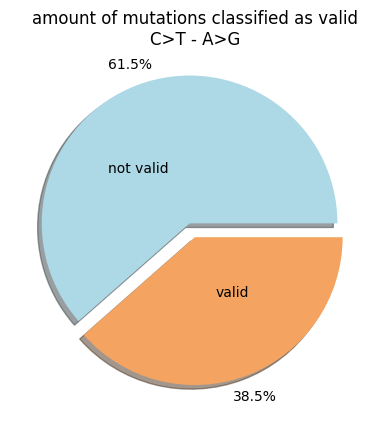

In [157]:
valid_mut1 = mut1_df.groupby(['VALID']).sum()
print(valid_mut1)
labels = 'not valid','valid'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_mut1['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.15, labeldistance=.4, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of mutations classified as valid\nC>T - A>G');

/scratch/local/ipykernel_65496/2664952553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_mut2 = mut2_df.groupby(['VALID']).sum()


       CHROM        START          END    NR  COR_AA  HAP  AA=REF  INDELS
VALID                                                                    
0         77   9311830242   9311830319  6302      78   61      56       5
1         84  10173825482  10173825566  6738     105   84      76       6


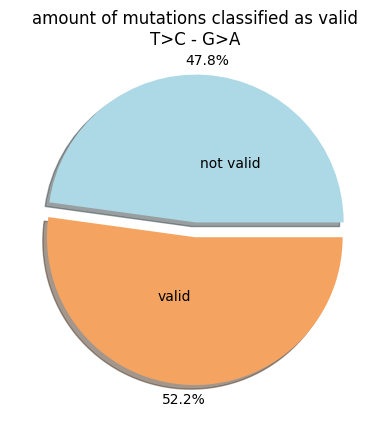

In [158]:
valid_mut2 = mut2_df.groupby(['VALID']).sum()
print(valid_mut2)
labels = 'not valid','valid'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_mut2['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.1, labeldistance=.4, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of mutations classified as valid\nT>C - G>A');

/scratch/local/ipykernel_65496/2665138675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_mut3 = mut3_df.groupby(['VALID']).sum()


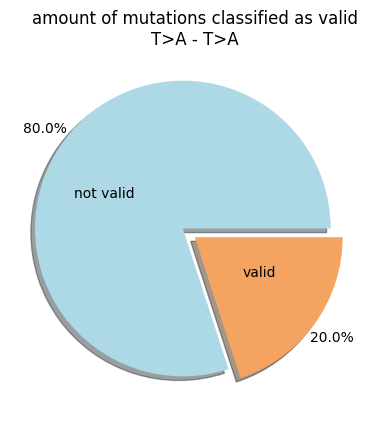

In [116]:
valid_mut3 = mut3_df.groupby(['VALID']).sum()

labels = 'not valid','valid'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_mut3['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.15, labeldistance=.4, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of mutations classified as valid\nT>A - T>A');

/scratch/local/ipykernel_65496/1575552488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aa_mut1 = mut1_df.groupby(['AA=REF']).sum()


        CHROM        START          END    NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                   
0          33   4103106721   4103106754  2591      9       6   24       1
1         115  13529068441  13529068556  8435     48     124  113       6


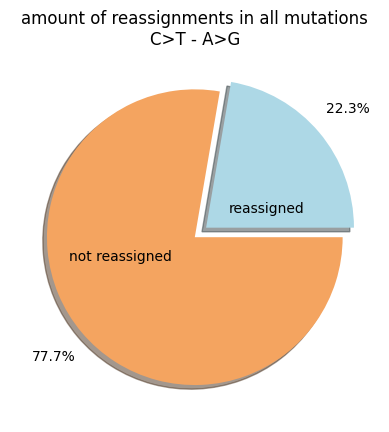

In [160]:
aa_mut1 = mut1_df.groupby(['AA=REF']).sum()
print(aa_mut1)
labels = 'reassigned','not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(aa_mut1['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in all mutations\nC>T - A>G');

/scratch/local/ipykernel_65496/3982177312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aa_mut2 = mut2_df.groupby(['AA=REF']).sum()


        CHROM        START          END     NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                    
0          29   3636237888   3636237917   2531      8      10   13       2
1         132  15849417836  15849417968  10509     76     173  132       9


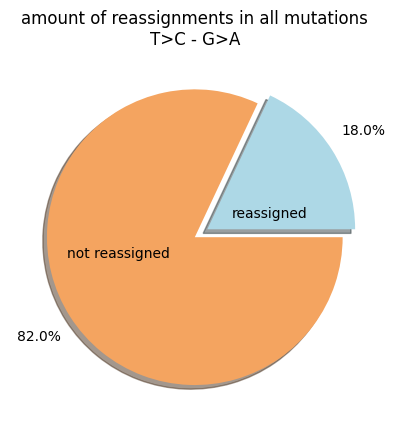

In [162]:
aa_mut2 = mut2_df.groupby(['AA=REF']).sum()
print(aa_mut2)
labels = 'reassigned','not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(aa_mut2['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in all mutations\nT>C - G>A');

/scratch/local/ipykernel_65496/991942689.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aa_mut3 = mut3_df.groupby(['AA=REF']).sum()


        CHROM       START         END    NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                 
0          15  2037042513  2037042528   493      4       0   10       5
1          45  5688291016  5688291061  1337      8      32   41      22


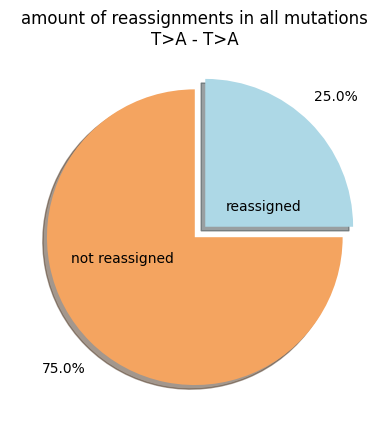

In [163]:
aa_mut3 = mut3_df.groupby(['AA=REF']).sum()
print(aa_mut3)
labels = 'reassigned','not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(aa_mut3['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in all mutations\nT>A - T>A');

        CHROM       START         END    NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                 
0           9  1267416438  1267416447   791      9       0    9       0
1          48  4755902482  4755902530  3026     48      63   48       2


/scratch/local/ipykernel_65496/2906497730.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_aa_mut1 = valid_df.groupby(['AA=REF']).sum()


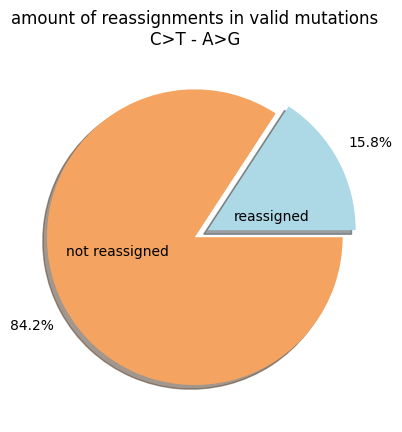

In [108]:
valid_df = mut1_df[mut1_df['VALID'] == 1]

valid_aa_mut1 = valid_df.groupby(['AA=REF']).sum()
print(valid_aa_mut1)
labels = 'reassigned', 'not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_aa_mut1['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in valid mutations\nC>T - A>G');

        CHROM       START         END    NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                 
0           8   927144105   927144113   645      8       0    8       1
1          76  9246681377  9246681453  6093     76     105   76       5


/scratch/local/ipykernel_65496/3879961329.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_aa_mut2 = valid_df.groupby(['AA=REF']).sum()


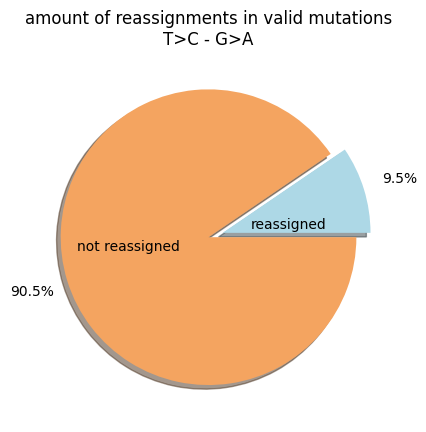

In [113]:
valid_df = mut2_df[mut2_df['VALID'] == 1]

valid_aa_mut2 = valid_df.groupby(['AA=REF']).sum()
print(valid_aa_mut2)
labels = 'reassigned', 'not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_aa_mut2['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in valid mutations\nT>C - G>A');

        CHROM       START         END   NR  VALID  COR_AA  HAP  INDELS
AA=REF                                                                
0           4   370948384   370948388   85      4       0    4       0
1           8  1147238038  1147238046  278      8       8    8       0


/scratch/local/ipykernel_65496/1145419016.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valid_aa_mut3 = valid_df.groupby(['AA=REF']).sum()


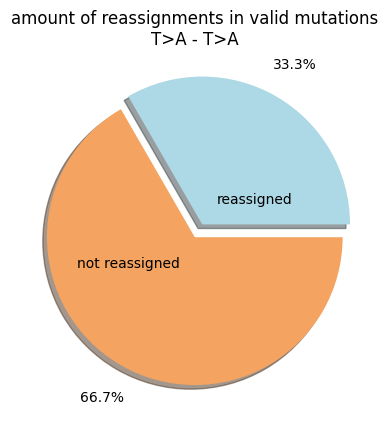

In [119]:
valid_df = mut3_df[mut3_df['VALID'] == 1]

valid_aa_mut3 = valid_df.groupby(['AA=REF']).sum()
print(valid_aa_mut3)
labels = 'reassigned', 'not reassigned'
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(valid_aa_mut3['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.2, colors=['lightblue', 'sandybrown', 'indigo','sienna'])
plt.title('amount of reassignments in valid mutations\nT>A - T>A');

## alteration for ancestral information

### pie chart

In [51]:
import matplotlib.pyplot as plt

genotypes = anc_df.loc[(anc_df['SAMPLES'] == "0|0") | (anc_df['SAMPLES'] == "0|1") | (anc_df['SAMPLES'] == "1|1")|(anc_df['SAMPLES'] == "1|0")]
genotypes = genotypes.groupby(['SAMPLES']).sum()
genotypes


/scratch/local/ipykernel_65496/3728956018.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genotypes = genotypes.groupby(['SAMPLES']).sum()


,CHROM,POS,QUAL
SAMPLES,,,
0|0,6077395,751107775605116,607739500
0|1,128710,16360668839504,12871000
1|0,127960,16253187031872,12796000
1|1,130164,16216680353928,13016400


Text(0.5, 1.0, 'genotypes in whole genome')

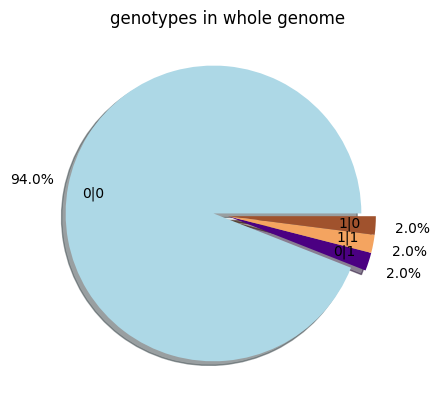

In [92]:
import matplotlib.pyplot as plt
labels = '0|0','0|1','1|1','1|0'
explode = (0.1, 0, 0, 0)
fig, ax = plt.subplots()
ax.pie(genotypes['CHROM'], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, pctdistance=1.25, labeldistance=.75, colors=['lightblue', 'indigo', 'sandybrown', 'sienna']);
plt.title('genotypes in whole genome')

### filter out 0/0´s

In [6]:
anc_df = anc_df[anc_df['SAMPLES']!='0|0']

### create match information

In [2]:
def match(row):
        m = ''
        if row.INFO == ".": 
                m = 'no info'
        elif row.INFO[3].upper()=='A' or row.INFO[3].upper()=='C' or row.INFO[3].upper()=='G'or row.INFO[3].upper()=='T':
                if (len(row.INFO) == 7) and row.INFO[3].upper() == row.REF: m = 'matches ref'
                elif (len(row.INFO) == 7) and row.INFO[3].upper() == row.ALT: m = 'matches alt'
                elif (len(row.INFO) == 7): m = 'no match'
                else: m = 'no info'
        else: m = 'no info'
        return m

anc_df['MATCH'] = anc_df.apply(lambda row: match(row), axis=1)
      

### reassign ancestral state

In [4]:
no_match = anc_df['MATCH'] == 'matches alt'

ref = anc_df.loc[no_match, 'REF'] 
alt = anc_df.loc[no_match, 'ALT']
anc_df.loc[no_match, 'REF'] = alt
anc_df.loc[no_match, 'ALT'] = ref 

### switch gt

In [5]:
def switch(sr):
    if sr == '0|1':
        sr_out = '1|0'
    if sr == '1|0':
        sr_out = '0|1'
    if sr == '1|1':
        sr_out = '0|0'
    else: 
        sr_out = sr
    return sr_out
      
s = anc_df.loc[no_match,'SAMPLES'] 
sr = s.apply(lambda x: switch(x))
anc_df.loc[no_match,'SAMPLES'] = sr

In [ ]:
anc_df 

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLES,MATCH
1,1,10352,.,T,TA,100,PASS,AA=|||unknown(NO_COVERAGE),GT,1|0,no info
8,1,10616,.,CCGCCGTTGCAAAGGCGCGCCG,C,100,PASS,.,GT,1|1,no info
45,1,14930,.,A,G,100,PASS,AA=a|||,GT,0|1,matches ref
52,1,15211,.,T,G,100,PASS,AA=t|||,GT,0|1,matches ref
57,1,15274,.,A,"G,T",100,PASS,AA=g|||,GT,0|1,no match
...,...,...,...,...,...,...,...,...,...,...,...
6468086,1,249240099,.,T,TA,100,PASS,AA=|||unknown(NO_COVERAGE),GT,1|1,no info
6468089,1,249240219,.,A,T,100,PASS,AA=.|||,GT,1|0,no info
6468090,1,249240537,.,GGT,G,100,PASS,.,GT,1|0,no info
6468091,1,249240539,.,T,G,100,PASS,AA=.|||,GT,0|1,no info


In [ ]:
from collections import Counter

Counter(anc_df.MATCH)

Counter({'no info': 66363,
         'matches ref': 192930,
         'no match': 3013,
         'matches alt': 128392})

### filter out rows without ancestral information

In [7]:
#for filtered
cor_anc_df = anc_df.loc[(anc_df['MATCH'] == "matches ref") | (anc_df['MATCH'] == "matches alt")]

print(cor_anc_df)

         CHROM        POS ID REF ALT  QUAL FILTER     INFO FORMAT SAMPLES  \
45           1      14930  .   A   G   100   PASS  AA=a|||     GT     0|1   
52           1      15211  .   T   G   100   PASS  AA=t|||     GT     0|1   
80           1      16141  .   C   T   100   PASS  AA=c|||     GT     0|1   
104          1      18849  .   G   C   100   PASS  AA=g|||     GT     0|1   
133          1      49298  .   T   C   100   PASS  AA=t|||     GT     1|0   
...        ...        ... ..  ..  ..   ...    ...      ...    ...     ...   
6467892      1  249226774  .   C   G   100   PASS  AA=c|||     GT     1|0   
6467907      1  249228454  .   A   C   100   PASS  AA=a|||     GT     0|1   
6467928      1  249229855  .   C   T   100   PASS  AA=c|||     GT     1|0   
6467932      1  249229967  .   C   A   100   PASS  AA=c|||     GT     1|0   
6467935      1  249230279  .   C   G   100   PASS  AA=c|||     GT     1|0   

               MATCH  
45       matches ref  
52       matches ref  
80    

## check reference and add context

In [8]:
from itertools import groupby
#df = anc_df.copy()
df = cor_anc_df.copy()

#function to parse FASTA files
def fasta_iter(fasta_name):

    fh = open(fasta_name)

    # ditch the boolean (x[0]) and just keep the header or sequence since
    # we know they alternate.
    faiter = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))

    for header in faiter:
    # drop the ">"
        headerStr = header.__next__()[1:].strip()

    # join all sequence lines to one.
        seq = "".join(s.strip() for s in faiter.__next__())

        seq = seq.upper()

        yield (headerStr, seq)

fiter = fasta_iter('../data/hg19/chr1.fa')

for ff in fiter:
    headerStr, seq = ff
    print("read files: " + headerStr)

def fa_ref(row):
    pos = row.POS-1
    fa_ref = []
    if pos <= len(seq): fa_ref.append(seq[pos])
    return ''.join(fa_ref)

df['FA_REF'] = df.apply(lambda row: fa_ref(row), axis=1)

def check_ref(row):
    pos = (row.POS)-1
    if pos <= len(seq):
        fa_ref = seq[pos]
        if fa_ref != row.REF:
            fa_ref = seq[pos+1]
            if fa_ref == row.REF:
                return "+1" 
            else: return "False"
        if fa_ref == row.REF:
            return "True"

df['REF_CHECK'] = df.apply(lambda row: check_ref(row), axis = 1)

#functions for CONTEXT columns
def context_generator_l(row,n):

    context_left = []

    if len(row.REF) == 1: #only 1 nucleotide for ref

            pos = row.POS #extract POS column per row

            for j in range(n):
                if pos <= len(seq): context_left.append(seq[pos-j-n+1])
            
            context_left.reverse()

    #else: print("more than 1 nucleotide for REF at position " + str(row.iloc[1]))

    return ''.join(context_left)

def context_generator_r(row,n):

    context_right = []

    if len(row.REF) == 1: #only 1 nucleotide for ref

            pos = row.POS #extract POS column per row

            for j in range(n):
                if pos <= len(seq): context_right.append(seq[pos+j])           

    #else: print("more than 1 nucleotide for REF at position " + str(row.iloc[1]))

    return ''.join(context_right)

df['CONTEXT_L'] = df.apply(lambda row: context_generator_l(row,3), axis = 1)
df['CONTEXT_R'] = df.apply(lambda row: context_generator_r(row,3), axis = 1)

read files: chr1


In [ ]:
from collections import Counter

Counter(df.REF_CHECK)

Counter({'True': 192930, 'False': 95900, '+1': 32492})

In [ ]:
cor_anc_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLES,MATCH
45,1,14930,.,A,G,100,PASS,AA=a|||,GT,0|1,matches ref
52,1,15211,.,T,G,100,PASS,AA=t|||,GT,0|1,matches ref
80,1,16141,.,C,T,100,PASS,AA=c|||,GT,0|1,matches ref
104,1,18849,.,G,C,100,PASS,AA=g|||,GT,1|0,matches alt
133,1,49298,.,T,C,100,PASS,AA=t|||,GT,1|0,matches ref
...,...,...,...,...,...,...,...,...,...,...,...
6467892,1,249226774,.,C,G,100,PASS,AA=c|||,GT,0|1,matches alt
6467907,1,249228454,.,A,C,100,PASS,AA=a|||,GT,1|0,matches alt
6467928,1,249229855,.,C,T,100,PASS,AA=c|||,GT,1|0,matches ref
6467932,1,249229967,.,C,A,100,PASS,AA=c|||,GT,1|0,matches ref


## add tuples and distance

In [9]:
#df=filtered_df
#df = anc_df.copy()
#df = cor_anc_df.copy()

dfpos = df.POS
dfpos_l = dfpos.diff()
dfpos_r = dfpos.iloc[::-1].diff()*(-1)

df['DIST_L'] = dfpos_l
df['DIST_R'] = dfpos_r

i = np.arange(0,2500)
#short_df = pd.DataFrame(index=i)

short_df = df.loc[(df['DIST_L']<3) | (df['DIST_R']<3)].copy()
short_df.reindex(i)

def extract_bases(row):
    context_left = []
    context_right = []
    if len(row.REF) == 1: #only 1 nucleotide for ref
        pos = row.POS #extract POS column per row
        if pos <= len(seq):
            context_left.append(seq[pos-2])
            context_right.append(seq[pos])
            context_right=''.join(context_right)
            context_left=''.join(context_left)
    tuple = (str(context_left),str(row.REF),str(context_right))
    return ''.join(tuple)

df['TUPLES'] = df.apply(lambda row: extract_bases(row), axis = 1).apply(str)
short_df['TUPLES'] = short_df.apply(lambda row: extract_bases(row), axis = 1).apply(str)



short_df 


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLES,MATCH,FA_REF,REF_CHECK,CONTEXT_L,CONTEXT_R,DIST_L,DIST_R,TUPLES
1363,1,533197,.,A,G,100,PASS,AA=a|||,GT,0|1,matches ref,A,True,CAC,CGG,84.0,1.0,CAC
1364,1,533198,.,C,T,100,PASS,AA=c|||,GT,0|1,matches ref,C,True,ACA,GGG,1.0,2897.0,ACG
2129,1,603515,.,C,A,100,PASS,AA=C|||,GT,0|1,matches ref,C,True,ATG,CCA,4682.0,1.0,GCC
2130,1,603516,.,C,A,100,PASS,AA=C|||,GT,0|1,matches ref,C,True,TGC,CAT,1.0,216443.0,CCC
9227,1,899969,.,T,G,100,PASS,AA=t|||,GT,0|1,matches ref,T,True,GGG,CCG,2644.0,1.0,GTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463343,1,249091149,.,A,C,100,PASS,AA=A|||,GT,1|0,matches ref,A,True,CTC,AAA,2.0,120.0,CAA
6464702,1,249134454,.,T,C,100,PASS,AA=T|||,GT,1|0,matches ref,T,True,GGC,ACT,8.0,2.0,CTA
6464703,1,249134456,.,A,C,100,PASS,AA=A|||,GT,1|0,matches alt,C,False,CTA,TTT,2.0,1376.0,AAT
6465788,1,249168163,.,T,C,100,PASS,AA=T|||,GT,1|0,matches ref,T,True,CAT,CGT,1121.0,2.0,TTC


# heatmaps/plots

## histogram matches in AA dataframe

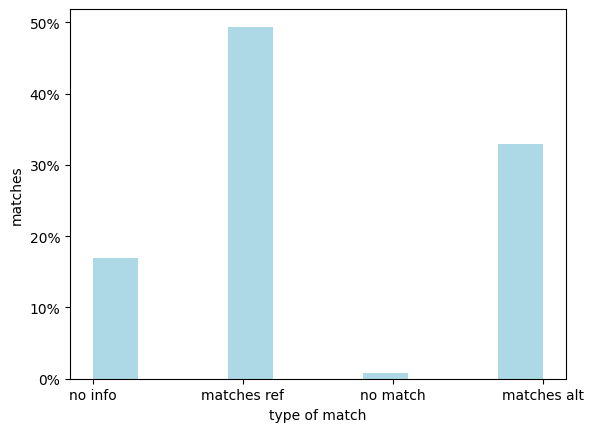

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

plt.hist(anc_df.MATCH, weights=np.ones(len(anc_df)) / len(anc_df), color='lightblue')
plt.ylabel('matches')
plt.xlabel('type of match')
plt.title('')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show();

In [140]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

## mutations in context (distances < 3)

In [141]:
#extract information: 'ACG' -> 'ATG' represented as ('CT' -> 'AG') 
import itertools
import seaborn as sns

mutation_df = pd.DataFrame()

def mutation(row):
    mutation = ""
    if len(row.REF) == 1 and len(row.ALT) == 1:
        mutation = row.REF+row.ALT
    return mutation

def env(row):
    env = ""
    if len(row.REF) == 1 and len(row.ALT) == 1 and row.TUPLES[0] != '[':
        env = row.TUPLES[0]+row.TUPLES[2]
    return env

mutation_df['MUTATION'] = short_df.apply(lambda row: mutation(row), axis=1) 
mutation_df['ENV'] = short_df.apply(lambda row: env(row), axis=1)

#filter empty cells
filter = mutation_df['ENV'] != "" 
mutation_df = mutation_df[filter]
filter = mutation_df['ENV'] != "NN" 
mutation_df = mutation_df[filter]
print(mutation_df)

#create every possible bp combo
a = ["A", "C", "G", "T"]
b = ["A", "C", "G", "T"]
c = list(itertools.product(a, b))
for i in range(len(c)):
    c[i]=''.join(c[i])

#create df for heatmap
arr = np.zeros((16,16))
heat_df = pd.DataFrame(arr, columns=c)
heat_df.set_index(c)

def table(row):
    m = row.MUTATION
    e = row.ENV
    
    heat_df.loc[c.index(m),e]+=1
    return heat_df

mutation_df = mutation_df.apply(lambda row: table(row), axis=1)

        MUTATION ENV
1363          AG  CC
1364          CT  AG
2129          CA  GC
2130          CA  CC
8652          CG  CA
...          ...  ..
6464400       TG  AG
6464401       AG  GC
6464702       TC  CA
6464703       AC  AT
6465788       TC  TC

[9210 rows x 2 columns]


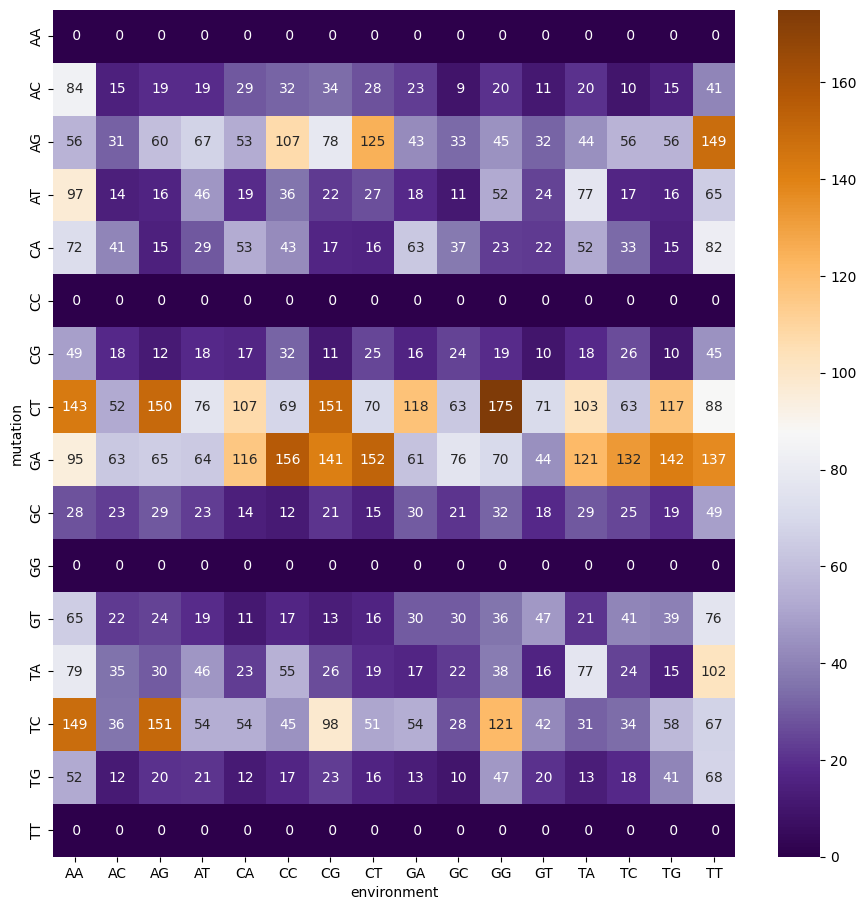

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(heat_df, annot=True, xticklabels=True, yticklabels=True, fmt='2g', cmap='PuOr_r')
ax.set(xlabel="environment", ylabel="mutation")
ax.set_yticklabels(c);

## mutations in context (distance = 1)

In [143]:
import itertools
import seaborn as sns

d1_df = df.loc[(df['DIST_L']==1) | (df['DIST_R']==1)].copy()

mutation_df = pd.DataFrame()

def mutation(row):
    mutation = ""
    if len(row.REF) == 1 and len(row.ALT) == 1:
        mutation = row.REF+row.ALT
    return mutation

def env(row):
    env = ""
    if len(row.REF) == 1 and len(row.ALT) == 1 and row.TUPLES[0] != '[':
        env = row.TUPLES[0]+row.TUPLES[2]
    return env

mutation_df['MUTATION'] = d1_df.apply(lambda row: mutation(row), axis=1) 
mutation_df['ENV'] = d1_df.apply(lambda row: env(row), axis=1)

#filter empty cells
filter = mutation_df['ENV'] != "" 
mutation_df = mutation_df[filter]
filter = mutation_df['ENV'] != "NN" 
mutation_df = mutation_df[filter]
print(mutation_df)

#create every possible bp combo
a = ["A", "C", "G", "T"]
b = ["A", "C", "G", "T"]
c = list(itertools.product(a, b))
for i in range(len(c)):
    c[i]=''.join(c[i])

#create df for heatmap
arr = np.zeros((16,16))
heat_df_d1 = pd.DataFrame(arr, columns=c)
heat_df_d1.set_index(c)

def table(row):
    m = row.MUTATION
    e = row.ENV
    
    heat_df_d1.loc[c.index(m),e]+=1
    return heat_df_d1

mutation_df = mutation_df.apply(lambda row: table(row), axis=1)

        MUTATION ENV
1363          AG  CC
1364          CT  AG
2129          CA  GC
2130          CA  CC
8652          CG  CA
...          ...  ..
6462887       GA  AG
6462963       TC  GG
6462964       GA  CA
6464400       TG  AG
6464401       AG  GC

[6096 rows x 2 columns]


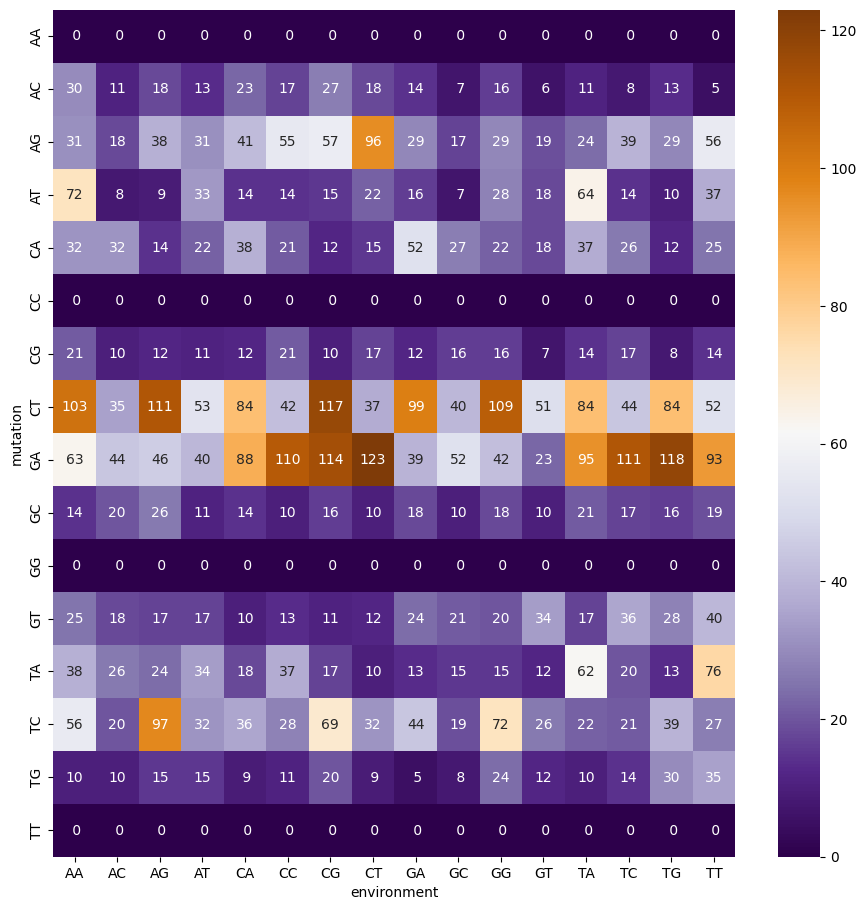

In [144]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(heat_df_d1, annot=True, xticklabels=True, yticklabels=True, fmt='2g', cmap='PuOr_r')
ax.set(xlabel="environment", ylabel="mutation")
ax.set_yticklabels(c);

## mutations in context (distance = 2)

In [145]:
import itertools
import seaborn as sns

d2_df = df.loc[(df['DIST_L']==2) | (df['DIST_R']==2)].copy()

mutation_df = pd.DataFrame()

def mutation(row):
    mutation = ""
    if len(row.REF) == 1 and len(row.ALT) == 1:
        mutation = row.REF+row.ALT
    return mutation

def env(row):
    env = ""
    if len(row.REF) == 1 and len(row.ALT) == 1 and row.TUPLES[0] != '[':
        env = row.TUPLES[0]+row.TUPLES[2]
    return env

mutation_df['MUTATION'] = d2_df.apply(lambda row: mutation(row), axis=1) 
mutation_df['ENV'] = d2_df.apply(lambda row: env(row), axis=1)

#filter empty cells
filter = mutation_df['ENV'] != "" 
mutation_df = mutation_df[filter]
filter = mutation_df['ENV'] != "NN" 
mutation_df = mutation_df[filter]
print(mutation_df)

#create every possible bp combo
a = ["A", "C", "G", "T"]
b = ["A", "C", "G", "T"]
c = list(itertools.product(a, b))
for i in range(len(c)):
    c[i]=''.join(c[i])

#create df for heatmap
arr = np.zeros((16,16))
heat_df_d2 = pd.DataFrame(arr, columns=c)
heat_df_d2.set_index(c)

def table(row):
    m = row.MUTATION
    e = row.ENV
    
    heat_df_d2.loc[c.index(m),e]+=1
    return heat_df_d2

mutation_df = mutation_df.apply(lambda row: table(row), axis=1)

        MUTATION ENV
13447         GT  GG
13448         GT  GT
13575         GA  CG
13576         GA  GG
15469         TC  GG
...          ...  ..
6463342       TC  CC
6463343       AC  CA
6464702       TC  CA
6464703       AC  AT
6465788       TC  TC

[3218 rows x 2 columns]


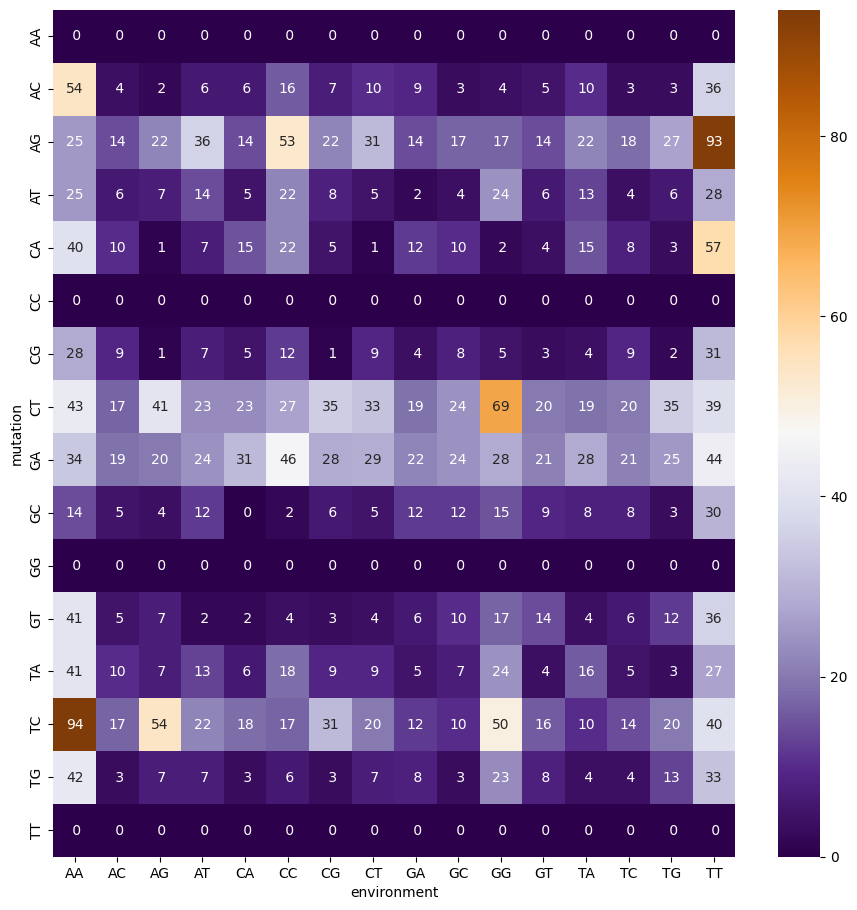

In [146]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(heat_df_d2, annot=True, xticklabels=True, yticklabels=True, fmt='2g', cmap='PuOr_r')
ax.set(xlabel="environment", ylabel="mutation")
ax.set_yticklabels(c);

## normalisation

### all mutations and short distance mutations

In [164]:
#same as above but w whole df

import itertools
import seaborn as sns

mutation_df = pd.DataFrame()

def mutation(row):
    mutation = ""
    if len(row.REF) == 1 and len(row.ALT) == 1:
        mutation = row.REF+row.ALT
    return mutation

def env(row):
    env = ""
    if len(row.REF) == 1 and len(row.ALT) == 1 and row.TUPLES[0] != '[':
        env = row.TUPLES[0]+row.TUPLES[2]
    return env

mutation_df['MUTATION'] = df.apply(lambda row: mutation(row), axis=1) 
mutation_df['ENV'] = df.apply(lambda row: env(row), axis=1)

#filter empty cells
filter = mutation_df['ENV'] != "" 
mutation_df = mutation_df[filter]
filter = mutation_df['ENV'] != "NN" 
mutation_df = mutation_df[filter]
print(mutation_df)

#create every possible bp combo
a = ["A", "C", "G", "T"]
b = ["A", "C", "G", "T"]
c = list(itertools.product(a, b))
for i in range(len(c)):
    c[i]=''.join(c[i])

#create df for heatmap
arr = np.zeros((16,16))
heat_df_big = pd.DataFrame(arr, columns=c)
heat_df_big.set_index(c)

def table(row):
    m = row.MUTATION
    e = row.ENV
    
    heat_df_big.loc[c.index(m),e]+=1
    return heat_df_big

mutation_df = mutation_df.apply(lambda row: table(row), axis=1)


        MUTATION ENV
45            AG  CA
52            TG  CG
80            CT  GG
104           GC  AT
133           TC  AA
...          ...  ..
6467892       CG  GT
6467907       AC  CC
6467928       CT  GC
6467932       CA  AC
6467935       CG  GT

[319739 rows x 2 columns]


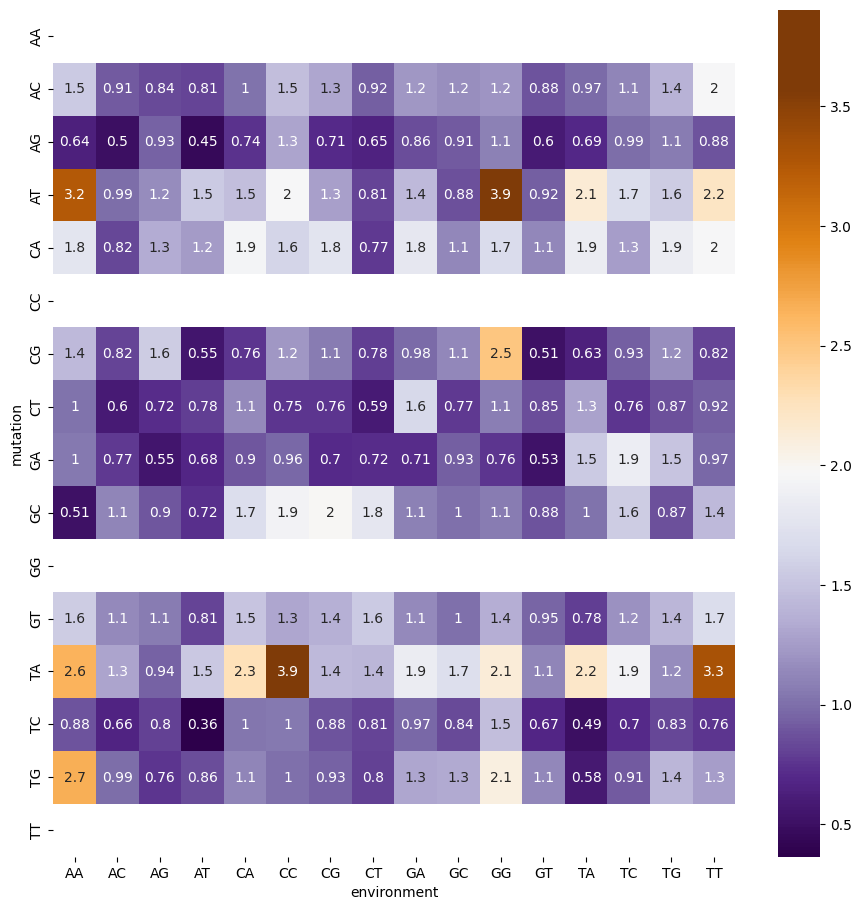

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap

orig_cmap = matplotlib.cm.PuOr_r
pretty_cmapppp= shiftedColorMap(orig_cmap, start=0, midpoint=1, stop=2.2, name='pretty_cmapppp')
#cmap = colors.ListedColormap(['steelblue','lavender','orangered'])
#bounds = [0, 0.99, 1.05, 5]
#norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(((heat_df/(short_df.shape[0]/192))/(heat_df_big/(df.shape[0]/192))), annot=True, xticklabels=True, yticklabels=True, cmap=pretty_cmapppp)
ax.set(xlabel="environment", ylabel="mutation")
ax.set_yticklabels(c);

### all mutations

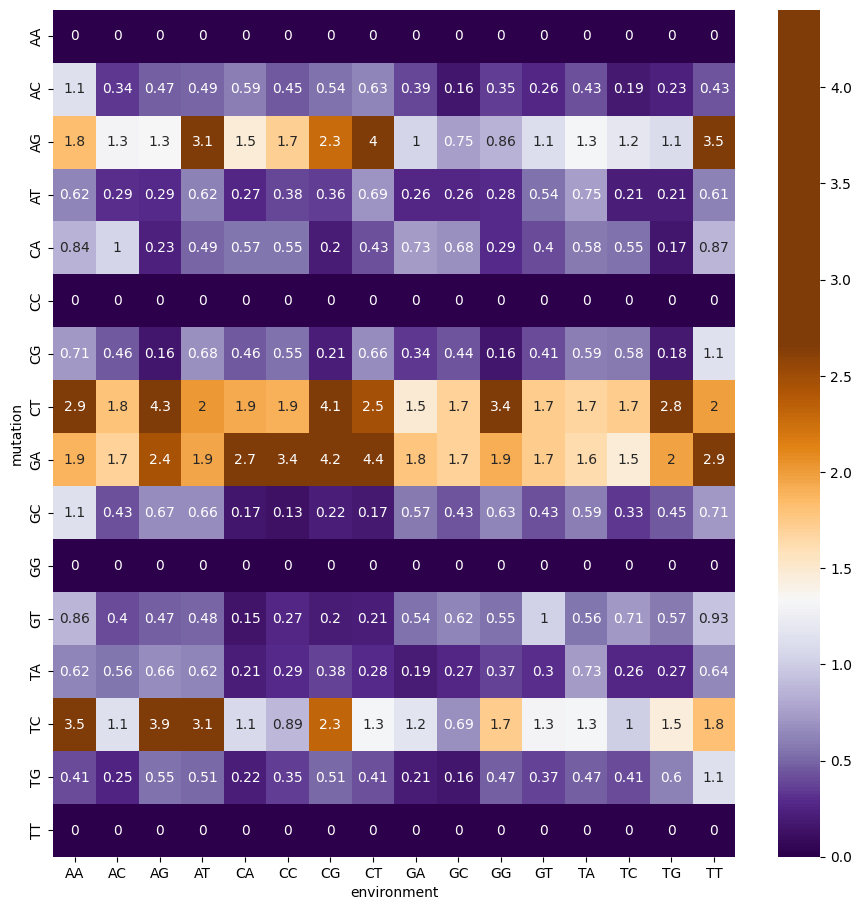

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap

data = ((heat_df_big/(df.shape[0]/192)))

#cmap = colors.ListedColormap(['steelblue','lavender','orangered'])
#bounds = [0, 0.95, 1.05, 5]
#norm = colors.BoundaryNorm(bounds, cmap.N)
pretty_cmappppp = shiftedColorMap(orig_cmap, start=0, midpoint=1, stop=3.3, name='shiftedcmappppp')

fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(data, annot=True, xticklabels=True, yticklabels=True, cmap=pretty_cmappppp)
ax.set(xlabel="environment", ylabel="mutation")
ax.set_yticklabels(c);


## neighboring mutations

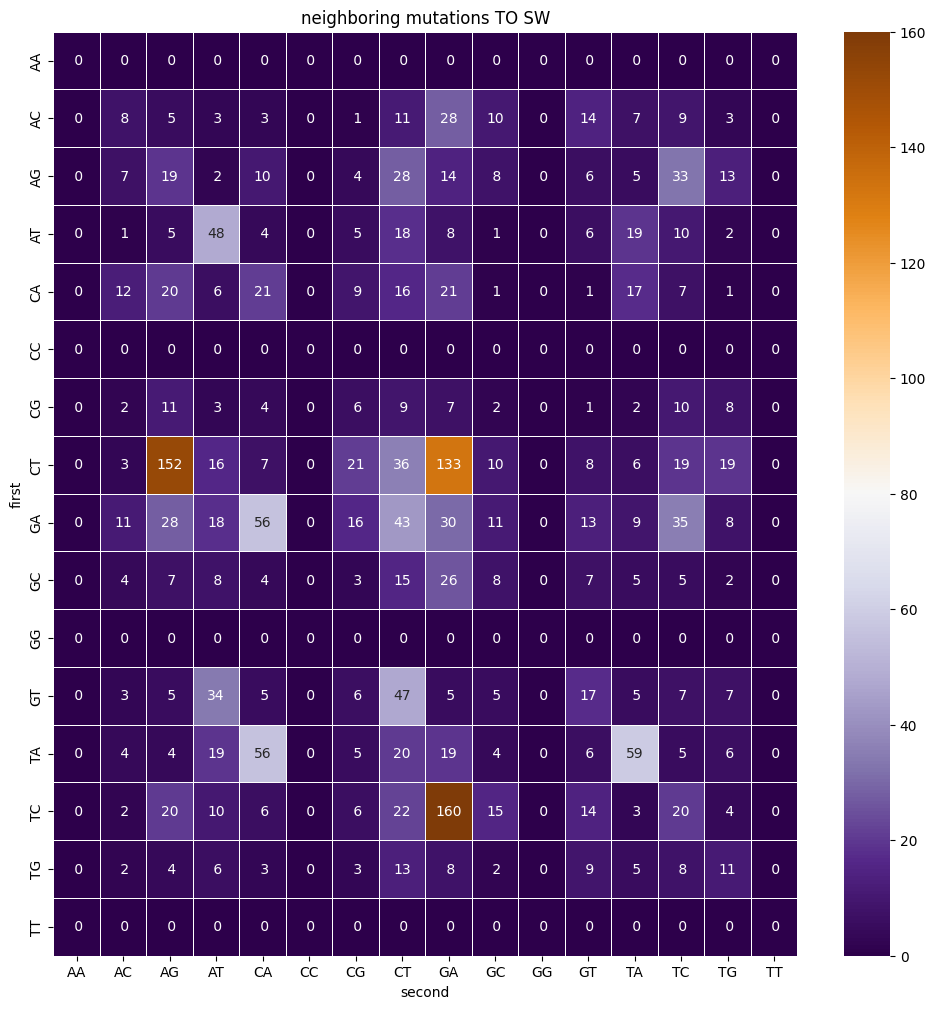

In [10]:
import itertools
import seaborn as sns
#add ref2 and alt2
ref = short_df[0:]['REF']
reflist = ref.to_list()
del reflist[0]
reflist.append('-')

alt = short_df[0:]['ALT']
altlist = alt.to_list()
del altlist[0]
altlist.append('-')

distr = short_df[0:]['DIST_R']
distrlist = distr.to_list()
del distrlist[0]
distrlist.append('-')

gt = short_df[0:]['SAMPLES']
gtlist = gt.to_list()
del gtlist[0]
gtlist.append('-')

m = short_df[0:]['MATCH']
mlist = m.to_list()
del mlist[0]
mlist.append('-')

cr = short_df[0:]['CONTEXT_R']
crlist = cr.to_list()
del crlist[0]
crlist.append('-')

short_df2 = short_df
short_df2['REF2'] = reflist
short_df2['ALT2'] = altlist
short_df2['DIST_R2'] = distrlist
short_df2['GT2'] = gtlist
short_df2['MATCH2'] = mlist
short_df2['CONTEXT_R2'] = crlist

#create table
a = ["A", "C", "G", "T"]
b = ["A", "C", "G", "T"]
c = list(itertools.product(a, b))
for i in range(len(c)):
    c[i]=''.join(c[i])

arr2 = np.zeros((16,16))
heat_df2 = pd.DataFrame(arr2, columns=c)
heat_df2.set_index(c)



def table2(row):
    if  row.DIST_R == 1 and len(row.ALT) == 1 and len(row.REF) == 1 and len(row.ALT2) == 1 and len(row.REF2) == 1 and row.GT2 != '0|0' and row.SAMPLES != '0|0' and  ((row.SAMPLES == row.GT2) or ((row.SAMPLES == '1|1') or (row.GT2 == '1|1'))):
        one = row.REF+row.ALT
        two = row.REF2+row.ALT2 
        heat_df2.loc[c.index(one),two]+=1
        return heat_df2
    
    
short_df2.apply(lambda row: table2(row),axis=1)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(heat_df2, annot=True, xticklabels=True, yticklabels=True, linewidths=0.5, fmt='2g', cmap='PuOr_r')
ax.set(xlabel="second", ylabel="first", title="neighboring mutations TO SW")
ax.set_yticklabels(c);

In [152]:
t=short_df2[short_df2['REF']=='C']
t=t[t['ALT']=='T']
t=t[t['REF2']=='A']
t=t[t['ALT2']=='G']
t=t[t['DIST_R']==1]
t=t[(t.SAMPLES==t.GT2) | (t.SAMPLES == '1|1') | (t.GT2 == '1|1')]
t=t[(t.SAMPLES != '0|0')]
t=t[(t.GT2 != '0|0')]

#t=t[t['MATCH']=='matches ref']
#t=t[t['MATCH2']=='matches ref']
t

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLES,...,CONTEXT_R,DIST_L,DIST_R,TUPLES,REF2,ALT2,DIST_R2,GT2,MATCH2,CONTEXT_R2
65140,1,2299310,.,C,T,100,PASS,AA=C|||,GT,0|1,...,ACC,72.0,1.0,CCA,A,G,316.0,0|1,matches ref,CCT
96703,1,3147290,.,C,T,100,PASS,AA=c|||,GT,1|1,...,AGC,39.0,1.0,GCA,A,G,40.0,1|1,matches ref,GCC
99489,1,3219496,.,C,T,100,PASS,AA=C|||,GT,1|1,...,ATC,61.0,1.0,ACA,A,G,404.0,1|1,matches ref,TCT
131280,1,4183257,.,C,T,100,PASS,AA=C|||,GT,0|1,...,GGG,472.0,1.0,TCG,A,G,3215.0,0|1,matches alt,GGT
160286,1,4999733,.,C,T,100,PASS,AA=c|||,GT,1|0,...,ATC,6.0,1.0,ACA,A,G,16.0,1|0,matches ref,TCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409021,1,247213838,.,C,T,100,PASS,AA=c|||,GT,1|1,...,ACC,546.0,1.0,GCA,A,G,245.0,1|1,matches ref,CCA
6413114,1,247339846,.,C,T,100,PASS,AA=C|||,GT,0|1,...,ACC,78.0,1.0,CCA,A,G,2.0,0|1,matches ref,CCT
6421863,1,247623315,.,C,T,100,PASS,AA=C|||,GT,1|0,...,ACC,3.0,1.0,CCA,A,G,8.0,1|0,matches ref,CCA
6431532,1,247947050,.,C,T,100,PASS,AA=C|||,GT,0|1,...,GTA,301.0,1.0,ACG,A,G,5.0,0|1,matches alt,TAC


In [ ]:
'''ay = t[['CHROM', 'POS']]
ay['POS2'] = ay['POS'] + 1
ay['ID'] = np.arange(ay.shape[0])
ay.to_csv('intervals_mut3.bed', sep='\t', index=False, header=False)'''


/scratch/local/ipykernel_18686/1149303065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ay['POS2'] = ay['POS'] + 1
/scratch/local/ipykernel_18686/1149303065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ay['ID'] = np.arange(ay.shape[0])


In [ ]:
ay = short_df[(short_df.DIST_L == 1) | (short_df.DIST_R == 1)][30:60]
ay

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLES,...,CONTEXT_R,DIST_L,DIST_R,TUPLES,REF2,ALT2,DIST_R2,GT2,MATCH2,CONTEXT_R2
16171,1,1069450,.,C,T,100,PASS,AA=C|||,GT,1|0,...,GAG,7.0,1.0,GCG,G,A,151.0,0|1,matches ref,AGA
16172,1,1069451,.,G,A,100,PASS,AA=G|||,GT,0|1,...,AGA,1.0,151.0,CGA,C,G,2.0,0|1,matches alt,ATC
18931,1,1135107,.,C,T,100,PASS,AA=c|||,GT,0|1,...,CTG,474.0,1.0,CCC,C,G,1560.0,0|1,matches ref,TGG
18932,1,1135108,.,C,G,100,PASS,AA=c|||,GT,0|1,...,TGG,1.0,1560.0,CCT,C,T,2.0,0|1,matches ref,CCG
26209,1,1298169,.,A,T,100,PASS,AA=A|||,GT,1|1,...,AAA,274.0,1.0,AAA,A,T,241.0,1|1,matches ref,AAA
26210,1,1298170,.,A,T,100,PASS,AA=A|||,GT,1|1,...,AAA,1.0,241.0,AAA,G,T,2.0,1|0,matches ref,GAT
32844,1,1451489,.,T,C,100,PASS,AA=t|||,GT,1|1,...,GGG,542.0,1.0,GTG,G,A,1076.0,1|1,matches ref,GGG
32845,1,1451490,.,G,A,100,PASS,AA=g|||,GT,1|1,...,GGG,1.0,1076.0,TGG,G,A,1.0,1|1,matches ref,CGA
33688,1,1466186,.,G,A,100,PASS,AA=g|||,GT,1|1,...,CGA,1908.0,1.0,GGC,C,T,9.0,1|1,matches ref,GAC
33689,1,1466187,.,C,T,100,PASS,AA=c|||,GT,1|1,...,GAC,1.0,9.0,GCG,G,C,1.0,0|0,matches alt,GGG


## neighboring info

In [153]:
nucleotides = ['C', 'G', 'A', 'T']
arr3 = np.zeros((2,4))
pdf = pd.DataFrame(arr3, columns=nucleotides)
pdf.set_index(nucleotides)

def ptable(row):
    up = row.TUPLES[0]
    down = row.CONTEXT_R2[0]
    pdf.iat[0,nucleotides.index(up)]+=1
    pdf.iat[1,nucleotides.index(down)]+=1
    return pdf

t.apply(lambda row: ptable(row), axis=1)
pdf

,C,G,A,T
0,44.0,39.0,40.0,29.0
1,29.0,37.0,27.0,59.0


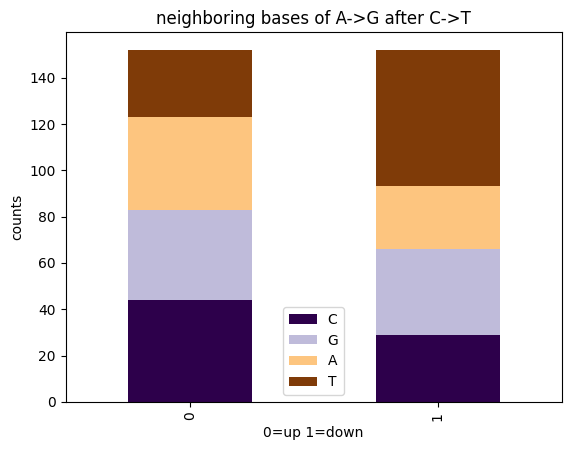

In [154]:
pdf.plot(kind='bar', stacked=True, ylabel='counts', xlabel='0=up 1=down',title='neighboring bases of A->G after C->T',colormap='PuOr_r');